# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     598.3
Date:                Wed, 17 May 2023   Prob (F-statistic):           7.64e-37
Time:                        23:42:25   Log-Likelihood:                -8.9522
No. Observations:                  50   AIC:                             25.90
Df Residuals:                      46   BIC:                             33.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0717      0.103     49.315      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.63584049  5.08191056  5.49175287  5.8399467   6.1102455   6.29824621
  6.41211267  6.47123428  6.50304043  6.53849388  6.60700372  6.73159348
  6.92511847  7.18815368  7.50889931  7.86511945  8.22779533  8.56589312
  8.85146259  9.06422934  9.19492577  9.24681376  9.23514871  9.18467318
  9.12555169  9.08841482  9.09932669  9.17550268  9.322481    9.53321277
  9.78922017 10.06363222 10.32559968 10.54536346 10.69914394 10.77304792
 10.76535123 10.68678199 10.55875802 10.40986796 10.27117423 10.17110956
 10.13080557 10.16062092 10.2584394  10.41001761 10.59132513 10.77249264
 10.92271936 11.01533353]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.02459049 10.91129027 10.69372501 10.41358019 10.12572854  9.88479535
  9.73178421  9.68403795  9.73099252  9.8367634 ]


## Plot comparison

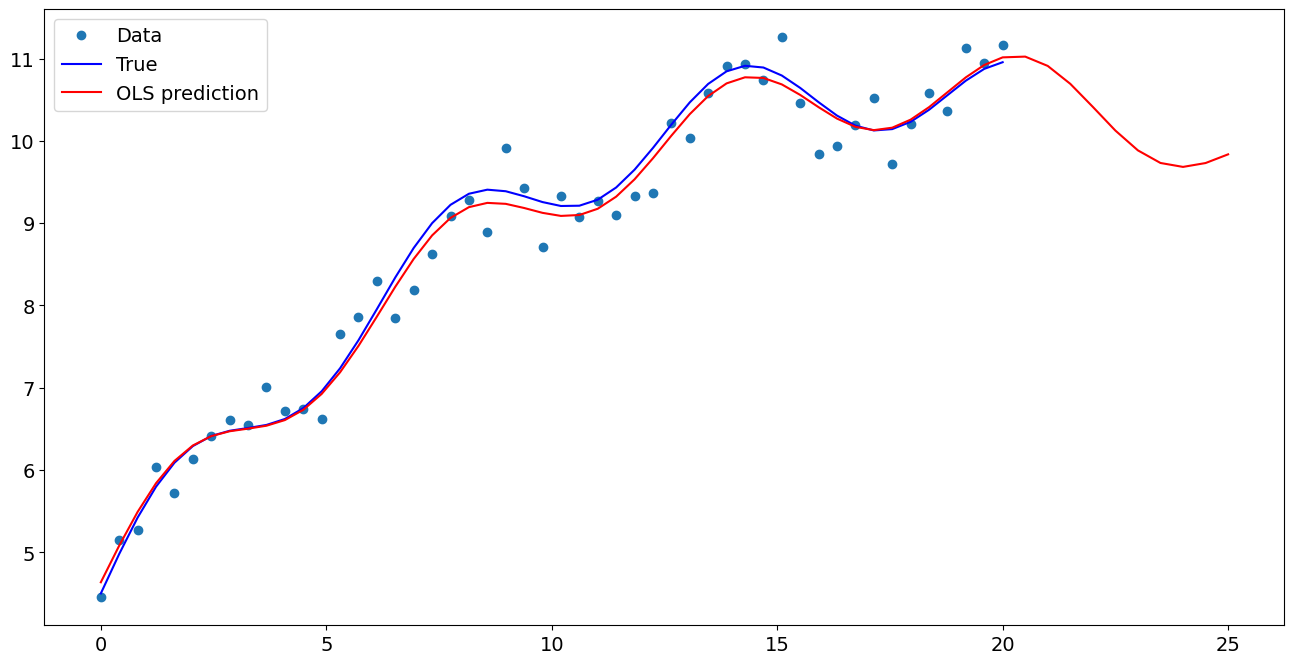

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.071723
x1                  0.472036
np.sin(x1)          0.466443
I((x1 - 5) ** 2)   -0.017435
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.024590
1    10.911290
2    10.693725
3    10.413580
4    10.125729
5     9.884795
6     9.731784
7     9.684038
8     9.730993
9     9.836763
dtype: float64